![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


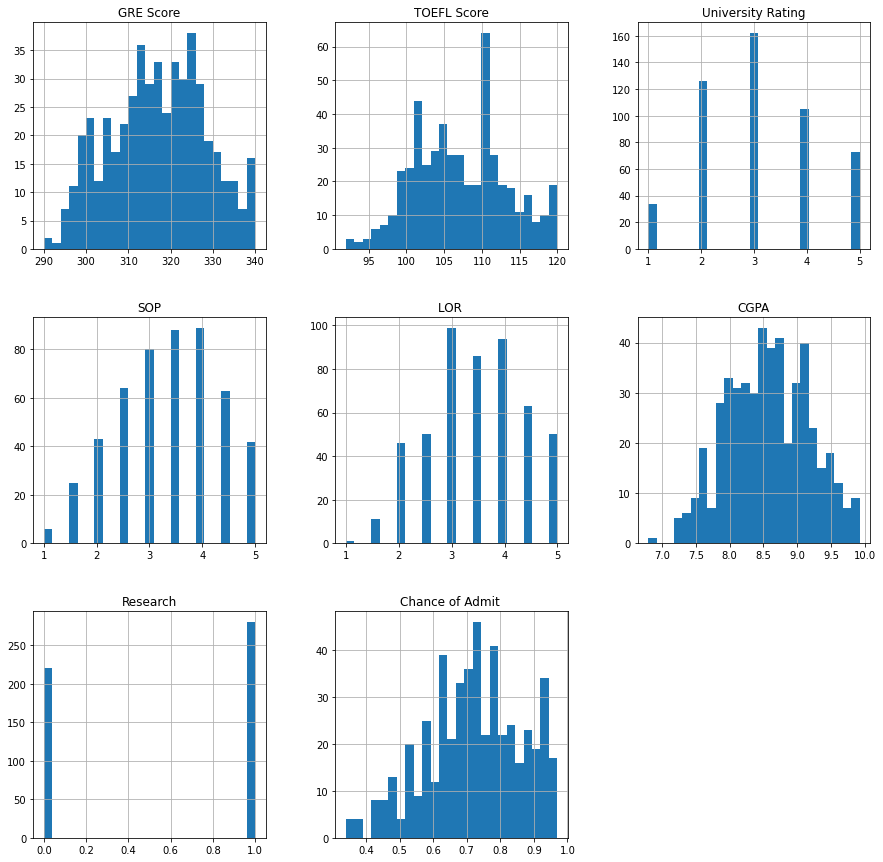

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)

Y = pd.DataFrame(np.array(data[data.columns[-1]]), columns=['labels'])

In [6]:
Y 

,labels
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [10]:
yTrain

array([[0.69],
       [0.49],
       [0.84],
       [0.83],
       [0.78],
       [0.76],
       [0.55],
       [0.79],
       [0.76],
       [0.58],
       [0.65],
       [0.7 ],
       [0.92],
       [0.54],
       [0.82],
       [0.65],
       [0.64],
       [0.53],
       [0.75],
       [0.61],
       [0.85],
       [0.74],
       [0.78],
       [0.73],
       [0.96],
       [0.51],
       [0.71],
       [0.68],
       [0.71],
       [0.96],
       [0.77],
       [0.82],
       [0.8 ],
       [0.65],
       [0.6 ],
       [0.73],
       [0.58],
       [0.74],
       [0.85],
       [0.95],
       [0.58],
       [0.46],
       [0.79],
       [0.7 ],
       [0.93],
       [0.73],
       [0.55],
       [0.94],
       [0.76],
       [0.69],
       [0.89],
       [0.94],
       [0.89],
       [0.78],
       [0.75],
       [0.84],
       [0.68],
       [0.68],
       [0.73],
       [0.93],
       [0.52],
       [0.56],
       [0.87],
       [0.45],
       [0.64],
       [0.67],
       [0.

In [11]:
# Definición de dimensiones de salida, varaibles de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [12]:
# Definición de dimensiones de entrada, variables predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

7 input variables


In [13]:
loss=[]
mae=[]
mse=[]
def updateMetrics(model,xTest, yTest):
    score=model.evaluate(xTest, yTest)
    loss.append(score[0])
    mae.append(score[1])
    mse.append(score[2])

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [14]:
loss=[]
mae=[]
mse=[]

In [15]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [16]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss=keras.losses.Huber(),metrics=['mae','mse'])

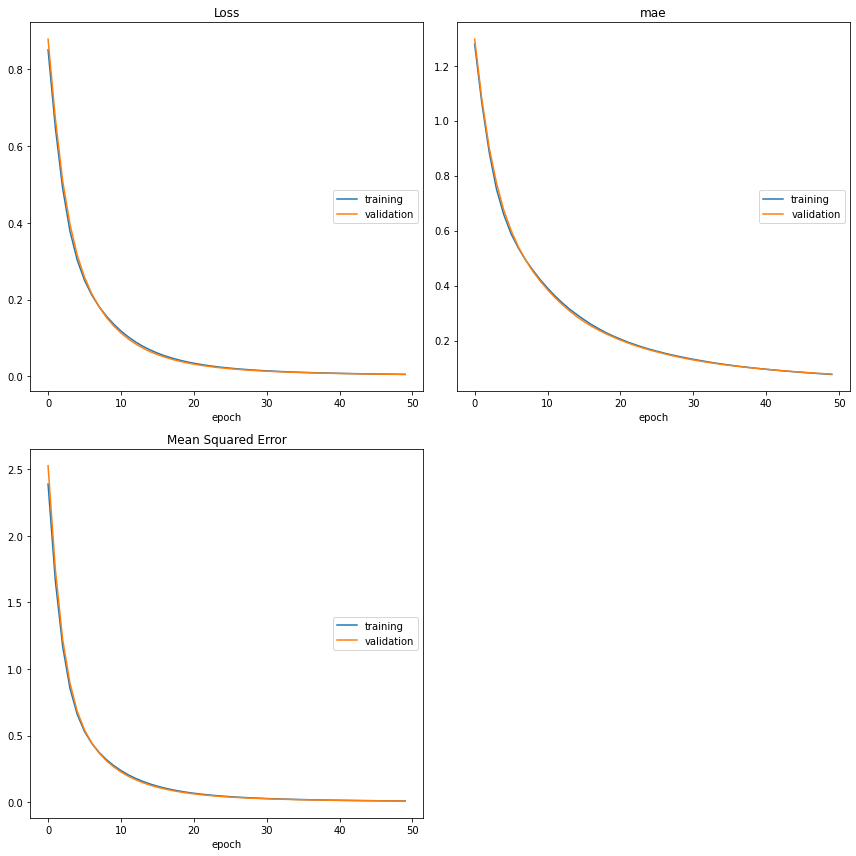

Loss
	training         	 (min:    0.005, max:    0.851, cur:    0.005)
	validation       	 (min:    0.005, max:    0.879, cur:    0.005)
mae
	training         	 (min:    0.077, max:    1.279, cur:    0.077)
	validation       	 (min:    0.078, max:    1.297, cur:    0.078)
Mean Squared Error
	training         	 (min:    0.010, max:    2.388, cur:    0.010)
	validation       	 (min:    0.010, max:    2.525, cur:    0.010)
11/11 [==============================] - 1s 60ms/step - loss: 0.0050 - mae: 0.0768 - mse: 0.0101 - val_loss: 0.0048 - val_mae: 0.0779 - val_mse: 0.0095


In [18]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [19]:
updateMetrics(model,xTest, yTest)

5/5 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0779 - mse: 0.0095


In [20]:
loss,mae,mse

([0.0047744810581207275], [0.07790832221508026], [0.009548962116241455])

### Conclusiones Punto 1
Se entrena una red neuronal de una capa con la librería Keras, se utiliza el optimizador: 
optimizer='sgd'
Se utiliza SGD como optimizador por su desempeño, robustez y flexibilidad, implementando los siguientes pasos:
1-	Calcular todos los cambios menores en cada parámetro de peso afectando la función de perdida
2-	Ajusta cada peso individual en función de su gradiente
3-	Se repiten los pasos 1 y 2 hasta que la función de perdida alcance su mínimo

Como función de perdida se utiliza la función Huber(), dadas las siguientes consideraciones:
loss= Huber()
Se emplea por ser una función de perdida parametrizada para problemas de regresión, esta función puede mejorar la solidez de la función de perdida del error cuadrático medio (MSE) frente a los valores atípicos.
Cuando la desviación de la predicción es menor que δ, usa el error al cuadrado,
Cuando la desviación de la predicción es mayor que δ, se usa el error lineal.

A nivel de Número de Epocas se usan 50 dado que al probar con un mayor número de epocas se va generando overfitting sobre la curva, mientras que con un menor número de epocas se genera underfitting y no se llega a la convergencia.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [21]:
# Definición de red neuronal de 2 capas
model1 = Sequential()
model1.add(Dense(16, input_shape=(dims,), activation='relu'))
model1.add(Dense(1, activation='relu'))

# Impresión de la arquitectura de la red neuronal
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                128       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model1.compile(optimizer='sgd', loss=keras.losses.Huber(), metrics=['mae','mse'])

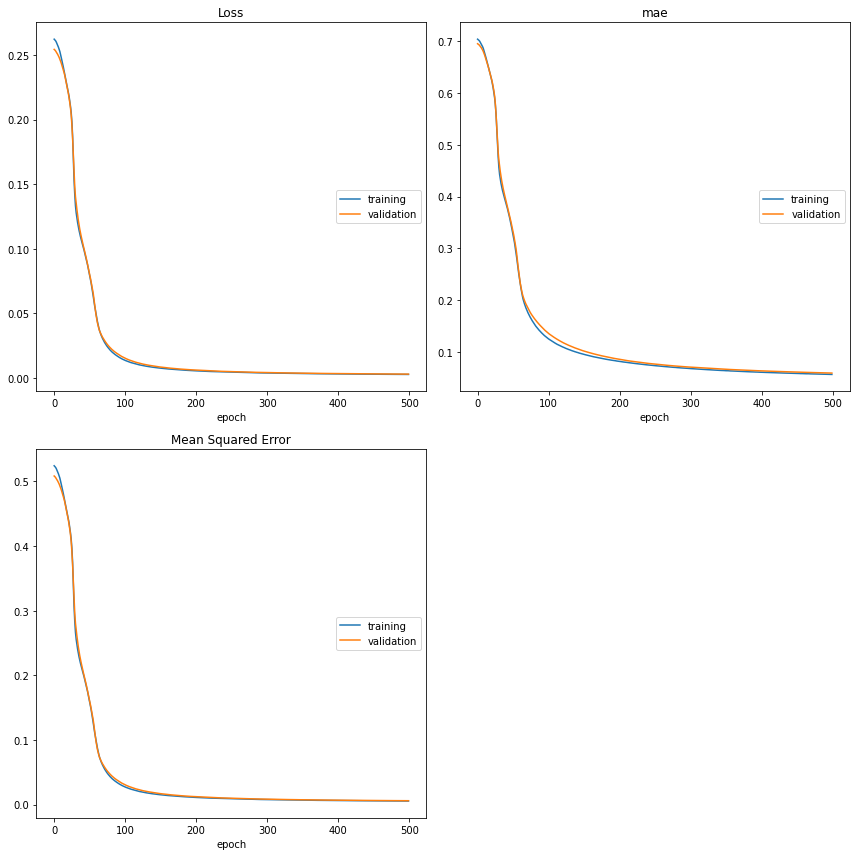

Loss
	training         	 (min:    0.003, max:    0.262, cur:    0.003)
	validation       	 (min:    0.003, max:    0.254, cur:    0.003)
mae
	training         	 (min:    0.056, max:    0.704, cur:    0.056)
	validation       	 (min:    0.059, max:    0.695, cur:    0.059)
Mean Squared Error
	training         	 (min:    0.006, max:    0.524, cur:    0.006)
	validation       	 (min:    0.006, max:    0.509, cur:    0.006)
11/11 [==============================] - 1s 149ms/step - loss: 0.0028 - mae: 0.0562 - mse: 0.0055 - val_loss: 0.0030 - val_mae: 0.0588 - val_mse: 0.0060


In [23]:
# Entrenamiento de la red neuronal con 500 épocas
model1.fit(xTrain, yTrain, 
          epochs=500, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [24]:
updateMetrics(model1,xTest, yTest)

5/5 [==============================] - 0s 5ms/step - loss: 0.0030 - mae: 0.0588 - mse: 0.0060


In [25]:
loss,mae,mse

([0.0047744810581207275, 0.003016668139025569],
 [0.07790832221508026, 0.05882541090250015],
 [0.009548962116241455, 0.006033336278051138])

### Conclusiones Punto 2
Se entrena una red neuronal de una capa con la librería Keras, se utiliza el optimizador: 
optimizer='sgd'
Se utiliza SGD como optimizador por su desempeño, robustez y flexibilidad, implementando los siguientes pasos:
1-	Calcular todos los cambios menores en cada parámetro de peso afectando la función de perdida
2-	Ajusta cada peso individual en función de su gradiente
3-	Se repiten los pasos 1 y 2 hasta que la función de perdida alcance su mínimo

Como función de perdida se utiliza la función Huber(), dadas las siguientes consideraciones:
loss= Huber()
Se emplea por ser una función de perdida parametrizada para problemas de regresión, esta función puede mejorar la solidez de la función de perdida del error cuadrático medio (MSE) frente a los valores atípicos.
Cuando la desviación de la predicción es menor que δ, usa el error al cuadrado,
Cuando la desviación de la predicción es mayor que δ, se usa el error lineal.

A nivel de Número de Epocas se usan 500 dado que al probar con un mayor número de epocas se va generando overfitting sobre la curva, no se obtienen mejoras significativas en el MSE y MAE, mientras que con un menor número de epocas se genera underfitting y no se llega a la convergencia. se observa que no se requiere una alta cantidad de neuronas para mejorar el desempeño del modelo, ya que con un alto número se genera Overfitting.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [27]:
# Definición de red neuronal de 2 capas con earlystop y dropout
model2 = Sequential()
model2.add(Dense(16, input_shape=(dims,), activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='relu'))
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                128       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
es = EarlyStopping(monitor = 'val_loss', patience=5)

In [29]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model2.compile(optimizer='sgd', loss=keras.losses.Huber(),metrics=['mae','mse'])

In [30]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel2 = 'best_model.h5'
best_model2 = ModelCheckpoint(fBestModel2, verbose=0, save_best_only=True)

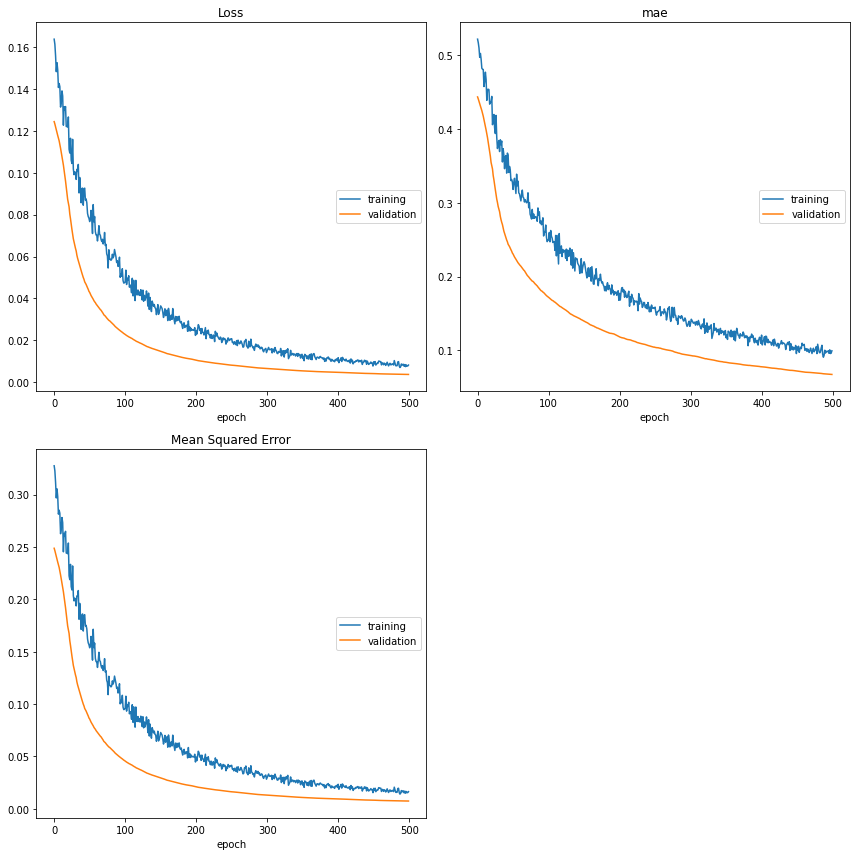

Loss
	training         	 (min:    0.007, max:    0.164, cur:    0.008)
	validation       	 (min:    0.004, max:    0.124, cur:    0.004)
mae
	training         	 (min:    0.091, max:    0.521, cur:    0.100)
	validation       	 (min:    0.068, max:    0.443, cur:    0.068)
Mean Squared Error
	training         	 (min:    0.014, max:    0.328, cur:    0.016)
	validation       	 (min:    0.007, max:    0.249, cur:    0.007)
3/3 [==============================] - 1s 291ms/step - loss: 0.0082 - mae: 0.0996 - mse: 0.0163 - val_loss: 0.0037 - val_mae: 0.0676 - val_mse: 0.0074


In [31]:
# Entrenamiento de la red neuronal con 500 épocas y early stopping
model2.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=500, 
          batch_size=128,
          validation_data=(xTest,yTest),
          callbacks=[best_model2, es,PlotLossesKeras()])

In [32]:
updateMetrics(model2,xTest, yTest)

5/5 [==============================] - 0s 2ms/step - loss: 0.0037 - mae: 0.0676 - mse: 0.0074


In [33]:
loss,mae,mse

([0.0047744810581207275, 0.003016668139025569, 0.0036914523225277662],
 [0.07790832221508026, 0.05882541090250015, 0.06760436296463013],
 [0.009548962116241455, 0.006033336278051138, 0.0073829046450555325])

### Conclusiones Punto 3
Se entrena una red neuronal de una capa con la librería Keras, se utiliza el optimizador: 
optimizer='sgd'
Se utiliza SGD como optimizador por su desempeño, robustez y flexibilidad, implementando los siguientes pasos:
1-	Calcular todos los cambios menores en cada parámetro de peso afectando la función de perdida
2-	Ajusta cada peso individual en función de su gradiente
3-	Se repiten los pasos 1 y 2 hasta que la función de perdida alcance su mínimo

Como función de perdida se utiliza la función Huber(), dadas las siguientes consideraciones:
loss= Huber()
Se emplea por ser una función de perdida parametrizada para problemas de regresión, esta función puede mejorar la solidez de la función de perdida del error cuadrático medio (MSE) frente a los valores atípicos.
Cuando la desviación de la predicción es menor que δ, usa el error al cuadrado,
Cuando la desviación de la predicción es mayor que δ, se usa el error lineal.

A nivel de Número de Epocas se usan 500 dado que al probar con un mayor número de epocas se va generando overfitting sobre la curva, y no se obtienen mejoras significativas en el MSE y MAE, mientras que con un menor número de epocas se genera underfitting y no se llega a la convergencia. A nivel de neuronas se usan las mismas contempladas para el modelo de dos capas del punto 2, se observa que no se requiere una alta cantidad de neuronas para mejorar el desempeño del modelo, ya que con un alto número se genera Overfitting.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

### Conclusiones
Se observa que se presenta un menor MSE y MAE en el modelo de dos capas sin early stopping y dropout, aunque los resultados son cercanos. Se puede observar esta situación dado que en el punto 2 no se llega a overfitting por lo que el dropout en el modelo de 2 capas puede afectar un poco el desempeño.  


### Comparacion funcion de perdidad - loss

In [35]:
def results(tit,vector):
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.set_title("Comparación de resultados - "+tit)
    ejeX = ['1 layer','multi layer','early stopping/dropout']
    ejeY = np.round(vector,3)
    ax.bar(ejeX,ejeY)
    def addlabels(x,y,plotP):
        for i in range(len(x)):
            plotP.text(i,y[i],y[i])
    addlabels(ejeX,ejeY,plt)
plt.show()

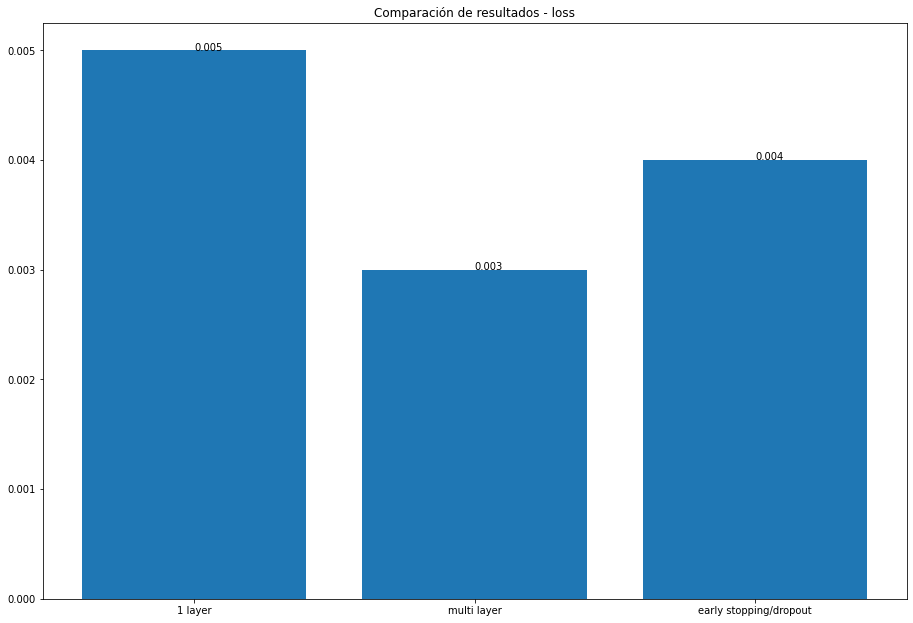

In [36]:
# Celda 5
results('loss',loss)

### Comparacion MAE

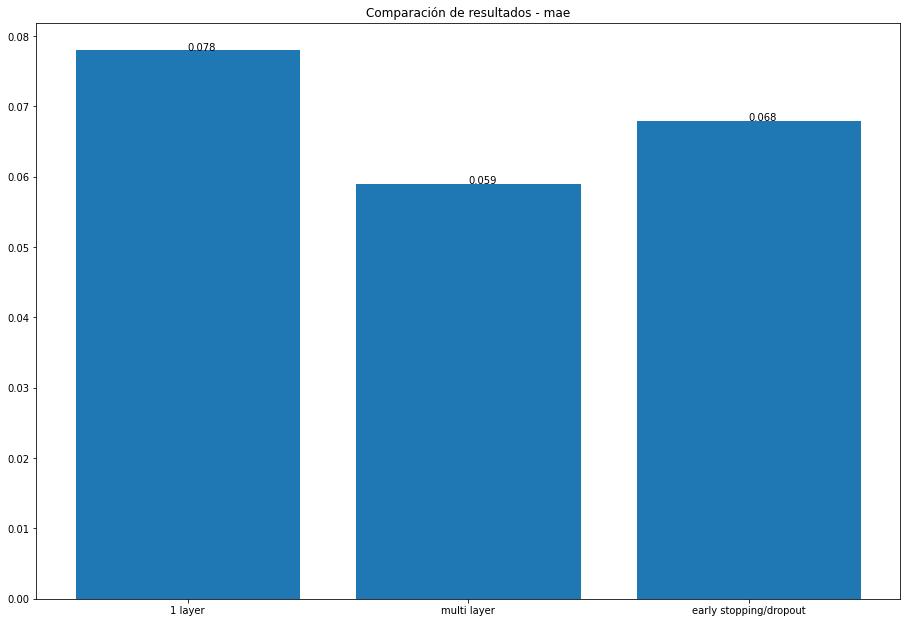

In [37]:
results('mae',mae)

### Comparacion MSE

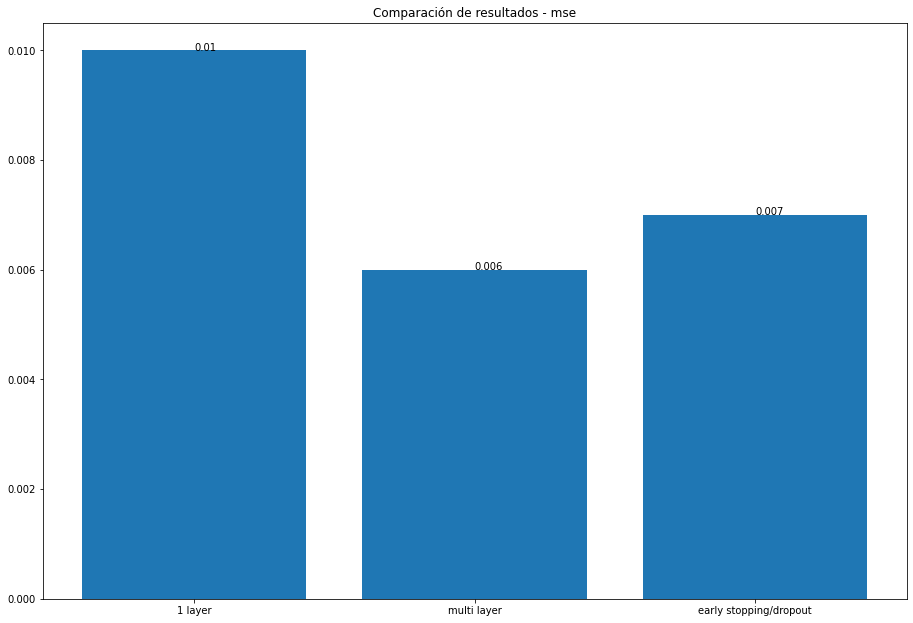

In [38]:
results('mse',mse)